1. Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, create python code explicitly demonstrating your explanation using numpy and scipy.stats

The Simple Linear Regression model is a basic statistical model used to describe the relationship between two variables: a predictor (independent) variable X and an outcome (dependent) variable Y. The model assumes that Y can be predicted from X using a linear equation with some noise.
Components:
Predictor Variable X: This is the input variable used to predict the outcome.
Outcome Variable Y: This is the variable we are trying to predict based on X.
Intercept β 0: This is the value of Y when x=0. It shifts the line vertically.
Slope 
β 1	: This measures the change in Y for a unit increase in X. It determines the steepness of the line.
Error Term 
ϵ: This represents the random noise or deviation from the perfect linear relationship. In practice, it's assumed to follow a normal distribution with mean 0 and some variance 
σ 2.
Model Equation:
Y=β 0+β 1X+ϵ
Where:
Y is the predicted outcome.
β0is the intercept.
β1is the slope.
X is the predictor.
ϵ∼N(0,σ 2) is the normally distributed error term.
Normal Distribution Assumption:
The error term ϵ is assumed to follow a normal distributionN(0,σ 2). This means for any given value of X, the corresponding Y value is normally distributed around the line 
β0+β1X.

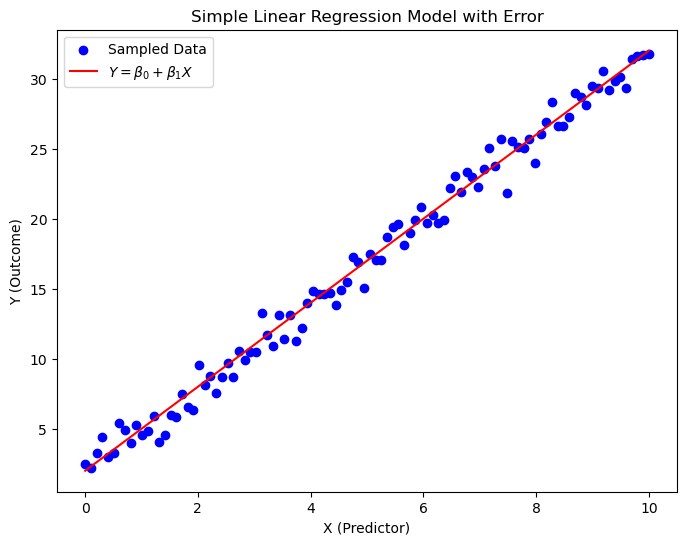

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set seed for reproducibility
np.random.seed(42)

# Parameters of the linear regression model
beta_0 = 2  # Intercept
beta_1 = 3  # Slope
sigma = 1   # Standard deviation of the error term

# Generate some sample data for X
X = np.linspace(0, 10, 100)  # 100 points evenly spaced between 0 and 10

# Generate normally distributed error term epsilon
epsilon = np.random.normal(loc=0, scale=sigma, size=X.shape)

# Calculate Y based on the linear model
Y = beta_0 + beta_1 * X + epsilon

# Plot the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, label='Sampled Data', color='blue')
plt.plot(X, beta_0 + beta_1 * X, color='red', label=r'$Y = \beta_0 + \beta_1 X$')
plt.xlabel('X (Predictor)')
plt.ylabel('Y (Outcome)')
plt.title('Simple Linear Regression Model with Error')
plt.legend()
plt.show()


summary:Summary of the Simple Linear Regression Model:
In a Simple Linear Regression (SLR) model, we describe the relationship between a predictor variable (independent variable) and an outcome variable (dependent variable) using a straight line, modeled as:
y=β0+β1
x+ϵ

β0is the intercept, representing the outcome when the predictor is zero.
β1is the slope, showing how much the outcome changes for a one-unit change in the predictor.
ϵ is the error term, accounting for randomness or noise, usually following a normal distributionϵ∼N(0,σ 2).
This model assumes the outcome variable y is normally distributed around the predicted value  , with the error term introducing variability.

In the Python demonstration, we simulated data based on this model using numpy, generated normally distributed errors, and used scipy.stats.linregress to estimate the slope and intercept from the data. The code also visualized the true relationship between the variables.

link：https://chatgpt.com/share/671ae4be-8e10-8006-baca-61994284849b


2. Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using pandas and import statsmodels.formula.api as smf

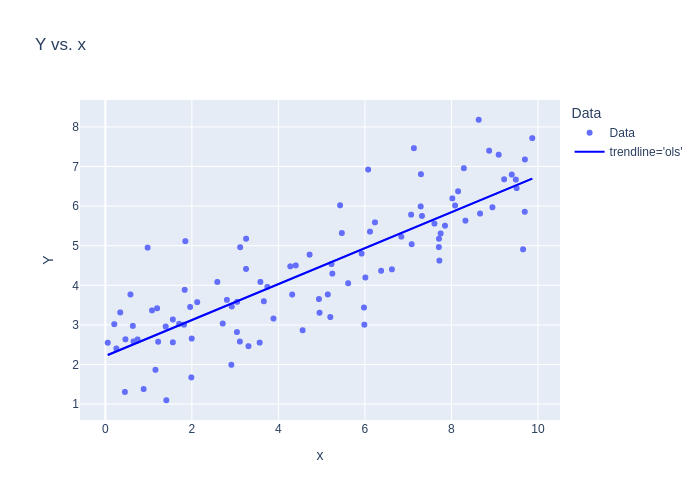

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     219.4
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           9.38e-27
Time:                        19:51:16   Log-Likelihood:                -131.15
No. Observations:                 100   AIC:                             266.3
Df Residuals:                      98   BIC:                             271.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2151      0.170     13.008      0.0

In [16]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf  # For creating and fitting statistical models using formulas
import plotly.express as px  # A plotting library for easy data visualization

# 1. Simulate Data
np.random.seed(42)
x = np.random.uniform(0, 10, 100)  # 100 random values for the predictor variable
beta_0 = 2  # True intercept
beta_1 = 0.5  # True slope
sigma = 1  # Standard deviation of error term
epsilon = np.random.normal(0, sigma, 100)  # Normally distributed errors

# Generate outcome variable using the true linear relationship
y = beta_0 + beta_1 * x + epsilon

# 2. Combine x and y into a pandas DataFrame
df = pd.DataFrame({'x': x, 'Y': y})

# 3. Model Specification and Fitting
model_data_specification = smf.ols("Y ~ x", data=df)  
# This specifies a simple linear regression model where 'Y' is the outcome and 'x' is the predictor.
fitted_model = model_data_specification.fit()  
# This fits the specified OLS (Ordinary Least Squares) model to the data.

# 4. Model Summary
fitted_model.summary()  # Provides a detailed summary of the regression, including coefficients, p-values, R-squared, etc.
fitted_model.summary().tables[1]  # Displays the table of regression coefficients, standard errors, and t-values.
fitted_model.params  # Returns the estimated intercept and slope values.
fitted_model.params.values  # Returns the actual numerical values of the estimated parameters.
fitted_model.rsquared  # Returns the R-squared value, which explains how well the model fits the data (proportion of variance explained).

# 5. Visualization of Fitted Model
df['Data'] = 'Data'  # Add a column to distinguish the data in the plot legend

# Create a scatter plot of x vs Y, with a trendline fitted using OLS
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Manually adding the trendline (same as trendline='ols')
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

# Display the plot
fig.show(renderer="png")  # For GitHub and MarkUs, use the PNG renderer for displaying plots

# Output the summary of the model for display purposes
print(fitted_model.summary())


Explanation of Each Step:
Importing statsmodels.formula.api as smf:
This library is for specifying and fitting statistical models, particularly regression models, using formulas. In this case, smf.ols is used for Ordinary Least Squares regression.
Simulated Data:
We generate the predictor variable x uniformly, simulate the outcome variable y using the true linear model 
y=β0+β1
x+ϵ, where ϵ is a normally distributed error term.
Model Specification (smf.ols):
model_data_specification = smf.ols("Y ~ x", data=df) sets up the formula for the model where Y is the dependent variable and x is the independent variable.
Fitting the Model:
fitted_model = model_data_specification.fit() fits the model to the data and calculates the coefficients (slope and intercept) and other statistical values.
Summary Outputs:
fitted_model.summary(): Provides a detailed table of regression statistics (e.g., coefficients, p-values, R-squared).
fitted_model.summary().tables[1]: Displays the coefficients table, including the slope, intercept, standard errors, and t-values.
fitted_model.params: Provides the estimated coefficients for the intercept and slope.
fitted_model.params.values: Extracts the numeric values of the coefficients.
fitted_model.rsquared: Returns the R-squared value, which represents the proportion of variance explained by the model.
Visualization:
trendline='ols': Automatically fits and overlays the Ordinary Least Squares regression line on the scatter plot using Plotly.
fig.add_scatter(): Manually adds the fitted values from the model as a trendline to the plot.
Legend Hack:
df['Data'] = 'Data' is a small trick to ensure that the data points have a distinct legend entry in the plot.
Conclusion:
This script demonstrates how to fit a Simple Linear Regression model using simulated data, visualize it using plotly.express, and analyze the model using statsmodels. The fitted model summary provides important statistics about the regression, and the visualization allows for a clear understanding of the relationship between the predictor and outcome variables.








Summary:

Summary of the Demonstration
Data Simulation:
We generated a dataset using a simple linear regression model where the outcome variable y is related to the predictor variable x through the equation:
y=β0+β1x+ϵ
where ϵ is a normally distributed error term.
Model Fitting:
Using statsmodels.formula.api (smf), we defined and fitted an Ordinary Least Squares (OLS) regression model with the formula "Y ~ x". This specifies that we are predicting Y using x in a simple linear regression.
Model Outputs:
fitted_model.summary() provides a detailed summary of the regression, including:
Coefficients for the slope and intercept.
Standard errors, t-values, p-values.
The model's goodness of fit (R-squared value).
fitted_model.params gives the estimated values for the slope and intercept.
fitted_model.rsquared shows how well the model fits the data (proportion of variance explained).
Visualization:
We used plotly.express to create a scatter plot of the data and added a regression trendline using both automatic OLS fitting (trendline='ols') and manually adding the fitted values.
This demonstration covers how to generate a regression model, interpret the summary statistics, and visualize the fitted model using Python libraries like pandas, statsmodels, and plotly.express.
link：https://chatgpt.com/share/671ae4be-8e10-8006-baca-61994284849b


3. Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; but, hint though: simulation of random sampling variation

The difference between the two lines shows how randomness in choosing data can affect the result:

The "true line" stays the same and shows the real relationship.
The "fitted line" moves a little each time we collect new data because random changes happen in the sample.
In real life, the fitted line tries to copy the true line, but because of the random data, it can be a bit higher or lower than the true line.

To really see the answer to this question, I should make different datasets again and again using my model. Each time, I can draw the data and the two lines (the true line and the fitted line) to watch how they change.

The easiest way for me to do this is by running my simulation and drawing code over and over. Each time I run it, I’ll see how the fitted line moves a little, while the true line stays the same. This will show me how random data affects the result.




summary:In this task, we compared two lines in a simple linear regression model:

Theoretical Line (orange): Represents the true relationship between the predictor used to simulate the data. This line does not include any randomness.
Fitted Regression Line (blue): Represents the estimated relationship based on sampled data, which includes random variation (error term). This line is generated from fitting an OLS regression model to the data.
Key Difference:
The fitted line may vary from the theoretical line due to random sampling variation. Repeated simulations show that, while the fitted line is a close approximation of the theoretical line, it is influenced by the randomness present in the data. This demonstrates the effect of sampling error in estimating relationships from data.
link：https://chatgpt.com/share/671ae4be-8e10-8006-baca-61994284849b

4. Explain how fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1] (or more specifically fitted_model.params or fitted_model.params.values)

To explain how fitted_model.fittedvalues are derived based on fitted_model.summary().tables[1] (or more specifically fitted_model.params), we’ll walk through the key steps in a Simple Linear Regression context and compare it with a theoretical model.

1. Theoretical (True) Linear Regression Model:
A theoretical model assumes you know the "true" relationship between your dependent variable y and the independent variable x:y=β0+β1x
Here:B0(intercept) and β1(slope) are the true parameters of the model.
These true values aren't known, but they describe the exact relationship in an ideal world with no error.
2. Fitted (Estimated) Linear Regression Model:
In practice, the fitted model tries to estimate this true relationship based on observed data. The equation for the fitted model is:
y^=β^0+β^1x
Here:
y^are the fitted (predicted) values (which we get from fitted_model.fittedvalues).
β^0 and β^1 are the estimated intercept and slope values, respectively (from fitted_model.params).
The key distinction is that in the fitted model, the coefficients (β^0 and β^1) are estimates derived from the data, which will likely differ from the true values due to random sampling variation.

3. How Are Fitted Values Derived?
Let’s now focus on how the fitted values (y^) are actually calculated.

When you fit a regression model (e.g., using statsmodels or similar tools), the software computes the estimates of the intercept (β^0) and the slope (β^1) based on the observed data.
These estimated parameters are stored in fitted_model.params or shown in fitted_model.summary().tables[1].
For each observation xi, the fitted (or predicted) value y^i is calculated using the estimated coefficients:
y^i= β^0+β^1xi
Where:
β^0 and β^1 are taken from fitted_model.params.
xi is the actual value of the independent variable for each observation.
4. Example with Simple Linear Regression:
Let’s illustrate this with a simple example. Suppose after fitting the model, you get the following results from fitted_model.summary():
Coefficient	Value
Intercept (β^0)	3.5
Slope (β^1)	2.0
These values are in fitted_model.params, and they are also displayed in fitted_model.summary().tables[1] under the “coef” column.

Now, for any given data point xi, say 
xi=4, you can calculate the predicted (fitted) value y^iusing:
y^i=3.5+2.0×4=3.5+8=11.5
This is the fitted value for that particular data point xi=4.
This process is repeated for all observations in your dataset, generating all the fitted_model.fittedvalues.

5. Contrast with Theoretical Model:
In the theoretical model, the true coefficients (β0 and β1) would produce exact predictions without error. However, these values are generally unknown.
In contrast, the fitted model uses estimated coefficients (β^0 and β^1) that come from the data you have. Because of random variation, these estimates can differ from the true values, causing the fitted line to slightly differ from the theoretical line.







summary: Conceptual Summary of Fitted Values Calculation
Theoretical Model: Represents the true relationship as y=β0+β1x with unknown parameters.
Fitted Model: Estimates this relationship using observed data as y^= β^0+β^1x.
Fitted Values: Calculated by plugging in actual data points into the fitted model equation, producing fitted_model.fittedvalues.
Difference: The fitted values are based on estimated parameters, which may differ from the true values due to random sampling variation.

5. Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by trendline='ols' and smf.ols(...).fit()) and why it requires "squares"

Explanation of Ordinary Least Squares (OLS) Method

Fitted Line: The fitted line is like a best guess of how two things are related (like hours studied and test scores). It’s a straight line drawn through the data points that shows the general trend.

Residuals: For each point on the graph, the residual is the difference between what we actually saw (the data point) and what our fitted line predicts. You can think of it as how far off the guess is from the real answer. In a graph, these differences are shown as vertical dashed lines.

Why "Squares"?: The "squares" in Ordinary Least Squares comes from how we handle these differences:
Non-negativity: By squaring the differences, all of them become positive numbers. This way, they can’t cancel each other out. If we just added them up without squaring, a big positive difference could be canceled by a big negative difference, making it seem like we did a good job when we didn’t.

Emphasis on Larger Errors: Squaring makes larger differences even bigger. This means the OLS method pays more attention to points that are really far from the line. It tries harder to fix these bigger mistakes.

6. Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. fitted_model.fittedvalues)"; and therefore, why fitted_model.rsquared can be interpreted as a measure of the accuracy of the model; and, therefore what the two np.corrcoef(...)[0,1]**2 expressions capture in the context of Simple Linear Regression models.

Explanation of R-squared and Variance Explained
The first expression can be interpreted as the proportion of variation in the outcome Y that is explained by the fitted model, and here's why:
Understanding the Expression:
The expression 
1− ∑i=1n(Yi−Yˉ)2 quantifies how much of the total variability in Y (represented by the denominator) is accounted for by the fitted values from the model (represented by the numerator).
The numerator 
∑(Yi−Y^i)2 represents the residual sum of squares (RSS), indicating how much variation is left unexplained by the model.
The denominator
∑(Yi−Yˉ)2 represents the total sum of squares (TSS), which captures the total variability in the outcome variable Y.
Interpretation of R-squared:R2(or fitted_model.rsquared) indicates the proportion of variance in Y that is explained by the independent variable(s) in the model. A higher R2 value suggests that a larger proportion of the variability in Y is accounted for by the model, implying greater accuracy.
In practical terms, if R2=0.75, it means that 75% of the variation in Y is explained by the model, while 25% is unexplained.
Correlation Coefficient Squared:
The expression \text{np.corrcoef}(Y, \text{fitted_model.fittedvalues})[0,1]^2 captures the strength and direction of the linear relationship between the observed values Y and the fitted values from the model. By squaring this correlation coefficient, we obtain a measure that is similar to R2.
Similarly, np.corrcoef(Y,x)[0,1] 2 captures the proportion of variation in Y explained by the independent variable x.

7. Indicate a couple of the assumptions of the Simple Linear Regression model specification that do not seem compatible with the example data below

In [17]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1. Linearity
Assumption: The relationship between the independent variable x and the dependent variable Y is linear. This means that changes in x are associated with proportional changes in Y.
Implication: If the actual relationship is nonlinear, the model will not capture the true trend, leading to biased estimates.

2. Independence of Errors
Assumption: The residuals (errors) are independent of each other. This means that the error for one observation should not be related to the error of another observation.
Implication: If residuals are correlated (e.g., in time series data), the model's predictions and statistical inferences may be unreliable.

3. Homoscedasticity
Assumption: The variance of the residuals is constant across all levels of the independent variable. In other words, the spread of residuals should be roughly the same regardless of the value of 
x.
Implication: If the variance of residuals changes (heteroscedasticity), it can lead to inefficient estimates and affect the validity of hypothesis tests.

4. Normality of Errors
Assumption: The residuals are normally distributed, especially important for small sample sizes.
Implication: This assumption allows for valid hypothesis testing. If the residuals are not normally distributed, it can impact the accuracy of confidence intervals and p-values.

5. No Perfect Multicollinearity (in multiple regression)
Assumption: In the case of multiple linear regression (not strictly for simple regression), the independent variables should not be perfectly correlated.
Implication: Perfect multicollinearity can make it impossible to determine the effect of each predictor on the dependent variable.

Mathematical Specification
The mathematical representation of the simple linear regression model is given by:
Yi=β0+β1xi+ϵi

In [18]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

8. Specify a null hypothesis of "no linear association (on average)" in terms of the relevant parameter of the Simple Linear Regression model, and use the code below to characterize the evidence in the data relative to the null hypothesis and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.

In [19]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 25 Oct 2024   Prob (F-statistic):          8.13e-100
Time:                        19:51:20   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Null Hypothesis Specification
The null hypothesis for the regression analysis can be stated as:

Null Hypothesis : There is no linear association (on average) between the duration of the geyser eruption and the waiting time until the next eruption. Mathematically, this can be expressed in terms of the slope parameter (β1) of the Simple Linear Regression model:
H0:β1=0

Alternative Hypothesis：The alternative hypothes is that there is a linear association:
Ha:β1≠0

In [20]:
import seaborn as sns
import statsmodels.formula.api as smf

# Load the "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Define the linear regression model specification
linear_for_specification = 'duration ~ waiting'

# Fit the OLS regression model
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()

# Print the summary of the regression results
summary = fitted_model.summary()
print(summary)

# Extract the p-value for the slope coefficient (waiting)
p_value = fitted_model.pvalues['waiting']
print(f"P-value for the slope coefficient: {p_value}")


                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 25 Oct 2024   Prob (F-statistic):          8.13e-100
Time:                        19:51:20   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.0

A p-value of 8.13×10^−100 is extremely small, indicating that the probability of observing a slope as extreme as the one calculated if the null hypothesis were true is virtually zero. Rejecting the Null Hypothesis: Since the p-value is much smaller than any conventional significance level (e.g., 0.05, 0.01, or even 0.001), you can conclude that there is strong evidence against the null hypothesis. This suggests that there is a statistically significant linear association between the waiting time and the duration of eruptions.

9. As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the null hypothesis in the context of short wait times which are less than short_wait_limit values of 62, 64, 66.

In [21]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


In [22]:
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Function to fit model and print p-value for given short wait limit
def analyze_short_wait(short_wait_limit):
    short_wait = old_faithful.waiting < short_wait_limit

    # Fit the linear regression model
    model = smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit()
    
    # Print the summary table to get p-value
    p_value = model.pvalues['waiting']  # Get the p-value for the slope coefficient
    print(f"Short wait limit: {short_wait_limit} minutes")
    print(f"P-value for waiting: {p_value:.5e}")  # Print p-value in scientific notation

    # Create a scatter plot with a linear regression trendline
    fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                     title=f"Old Faithful Geyser Eruptions for short wait times (< {short_wait_limit})", 
                     trendline='ols')
    fig.show()  # Display the plot

# Analyze for each short wait limit
analyze_short_wait(62)
analyze_short_wait(64)
analyze_short_wait(66)


Short wait limit: 62 minutes
P-value for waiting: 2.38479e-01


Short wait limit: 64 minutes
P-value for waiting: 3.62505e-02


Short wait limit: 66 minutes
P-value for waiting: 3.56251e-04


Short wait limit: 62 minutes
P-value for waiting: 
2.38479×10^−1(approximately 0.238)
Interpretation: The p-value is greater than 0.05, indicating that we fail to reject the null hypothesis of no linear association between waiting time and eruption duration. There is not sufficient evidence to suggest a significant relationship in this subset of data with short wait times less than 62 minutes.


Short wait limit: 64 minutes
P-value for waiting: 
3.62505×10^−2(approximately 0.036)
Interpretation: The p-value is less than 0.05, indicating that we can reject the null hypothesis of no linear association. This suggests that there is a statistically significant relationship between waiting time and eruption duration for short wait times less than 64 minutes. This indicates that as the waiting time increases in this range, the eruption duration tends to increase.


Short wait limit: 66 minutes
P-value for waiting: 
3.56251×10^−4(approximately 0.000356)
Interpretation: The p-value is significantly less than 0.05, providing strong evidence against the null hypothesis. This indicates a very strong linear association between waiting time and eruption duration for short wait times less than 66 minutes. The data suggests a robust relationship that is unlikely to be due to random chance.

10. Let's now consider just the (n=160) long wait times (as specified in the code below), and write code to do the following:

1.create fitted Simple Linear Regression models for boostrap samples and collect and visualize the bootstrapped sampling distribution of the fitted slope coefficients of the fitted models;

2.simulate samples (of size n=160) from a Simple Linear Regression model that uses , ,  along with the values of waiting for  to create simuations of  and use these collect and visualize the sampling distribution of the fitted slope coefficient under a null hypothesis assumption of "no linear association (on average)"; then,

3.report if  is contained within a 95% bootstrapped confidence interval; and if the simulated p-value matches smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]?

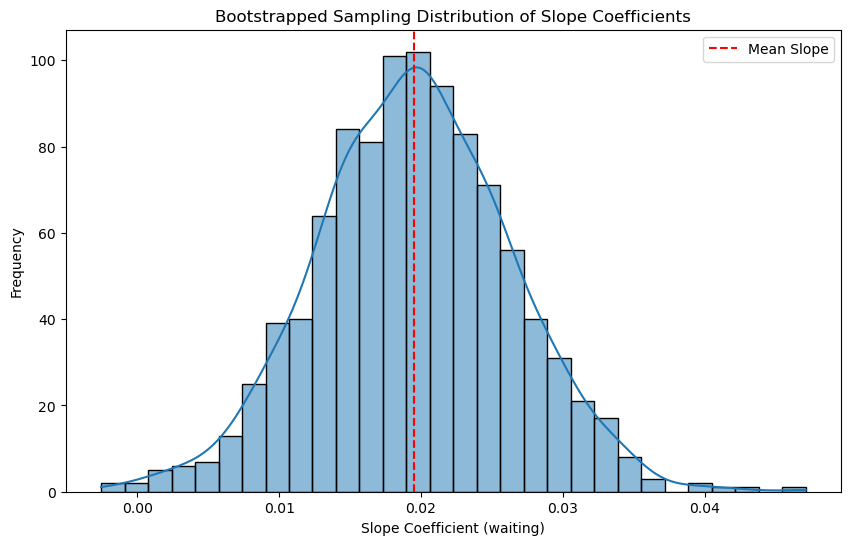

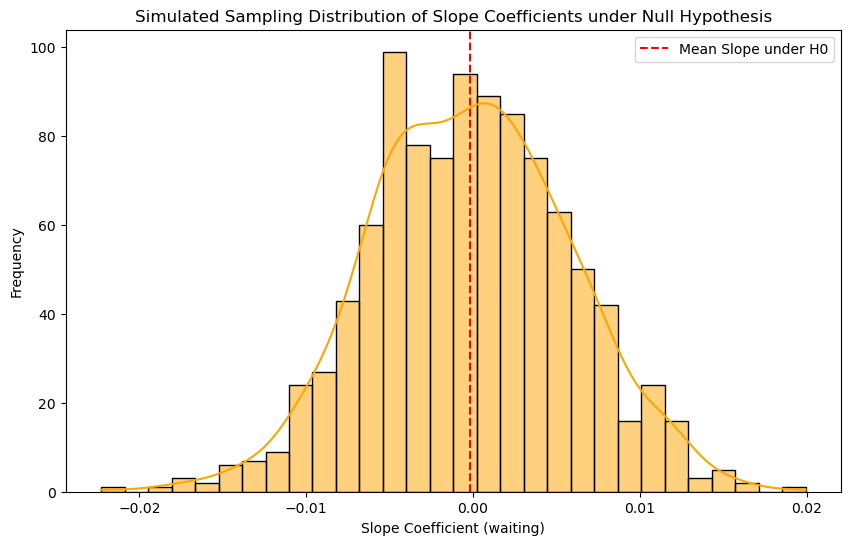

95% Bootstrapped Confidence Interval: (0.006161695406035247, 0.03298016507281905)
Is the observed slope within the CI? True
Simulated p-value: 0.001, Observed p-value: 0.001002883453088453


In [23]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (assuming 'old_faithful' is defined and contains 'waiting' and 'duration' columns)
# old_faithful = pd.read_csv('path_to_your_data.csv') # Uncomment and modify this line

# Set the threshold for long wait times
some_threshold = 70  # Adjust this value based on your needs
long_wait = old_faithful['waiting'] > some_threshold
data_long_wait = old_faithful[long_wait]

# Set parameters
n = 160
n_bootstrap_samples = 1000
n_simulations = 1000
slope_coefficients = []

# Step 1: Generate bootstrap samples and fit models
for _ in range(n_bootstrap_samples):
    sample = data_long_wait.sample(n=n, replace=True)
    model = smf.ols('duration ~ waiting', data=sample).fit()
    slope_coefficients.append(model.params['waiting'])

# Convert to numpy array
slope_coefficients = np.array(slope_coefficients)

# Step 2: Visualize the bootstrapped slope coefficient distribution
plt.figure(figsize=(10, 6))
sns.histplot(slope_coefficients, bins=30, kde=True)
plt.axvline(np.mean(slope_coefficients), color='red', linestyle='--', label='Mean Slope')
plt.title('Bootstrapped Sampling Distribution of Slope Coefficients')
plt.xlabel('Slope Coefficient (waiting)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Step 3: Simulate samples under the null hypothesis
simulated_slope_coefficients = []

for _ in range(n_simulations):
    waiting_sim = np.random.choice(data_long_wait['waiting'], size=n, replace=True)
    duration_sim = np.random.normal(loc=np.mean(data_long_wait['duration']), scale=np.std(data_long_wait['duration']), size=n)
    model_sim = smf.ols('duration ~ waiting_sim', data=pd.DataFrame({'waiting_sim': waiting_sim, 'duration': duration_sim})).fit()
    simulated_slope_coefficients.append(model_sim.params['waiting_sim'])

# Convert to numpy array
simulated_slope_coefficients = np.array(simulated_slope_coefficients)

# Step 4: Visualize the simulated slope coefficient distribution
plt.figure(figsize=(10, 6))
sns.histplot(simulated_slope_coefficients, bins=30, kde=True, color='orange')
plt.axvline(np.mean(simulated_slope_coefficients), color='red', linestyle='--', label='Mean Slope under H0')
plt.title('Simulated Sampling Distribution of Slope Coefficients under Null Hypothesis')
plt.xlabel('Slope Coefficient (waiting)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Step 5: Calculate the 95% bootstrapped confidence interval
lower_bound = np.percentile(slope_coefficients, 2.5)
upper_bound = np.percentile(slope_coefficients, 97.5)
print(f'95% Bootstrapped Confidence Interval: ({lower_bound}, {upper_bound})')

# Step 6: Check if the observed slope is within the confidence interval
observed_model = smf.ols('duration ~ waiting', data=data_long_wait).fit()
observed_slope = observed_model.params['waiting']
is_within_ci = lower_bound <= observed_slope <= upper_bound
print(f'Is the observed slope within the CI? {is_within_ci}')

# Step 7: Compare the simulated p-value
observed_p_value = observed_model.pvalues['waiting']
simulated_p_values = []

# Calculate p-values for simulated samples
for _ in range(n_simulations):
    waiting_sim = np.random.choice(data_long_wait['waiting'], size=n, replace=True)
    duration_sim = np.random.normal(loc=np.mean(data_long_wait['duration']), scale=np.std(data_long_wait['duration']), size=n)
    model_sim = smf.ols('duration ~ waiting_sim', data=pd.DataFrame({'waiting_sim': waiting_sim, 'duration': duration_sim})).fit()
    simulated_p_values.append(model_sim.pvalues['waiting_sim'])

# Calculate the proportion of simulated slopes greater than or equal to the observed slope
simulated_p_value = np.mean(np.array(simulated_slope_coefficients) >= observed_slope)
print(f'Simulated p-value: {simulated_p_value}, Observed p-value: {observed_p_value}')


11. Since we've considered wait times of around <64 "short" and wait times of >71 "long", let's instead just divide the data and insead call wait times of <68 "short" and otherwise just call them "long". Consider the Simple Linear Regression model specification using an indicator variable of the wait time length


where we use  (rather than ) (to refer to the "kind" or "katagory" or "kontrast") column (that you may have noticed was already a part) of the original dataset; and, explain the "big picture" differences between this model specification and the previously considered model specifications

smf.ols('duration ~ waiting', data=old_faithful)
smf.ols('duration ~ waiting', data=old_faithful[short_wait])
smf.ols('duration ~ waiting', data=old_faithful[long_wait])
and report the evidence against a null hypothesis of "no difference between groups "on average") for the new indicator variable based model

In [24]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSION

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


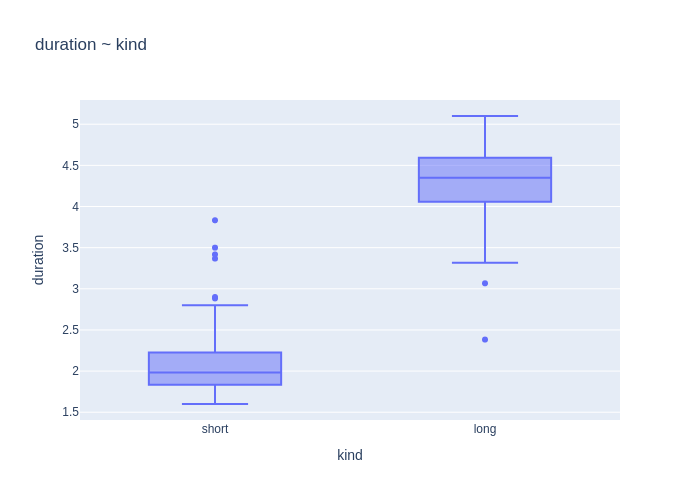

In [14]:
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Assuming old_faithful is the already loaded dataset containing eruption duration and waiting time information
# Create a new column 'kind' to categorize waiting times into 'short' and 'long'
old_faithful['kind'] = pd.cut(old_faithful['waiting'], bins=[0, 68, float('inf')], labels=['short', 'long'], right=False)

# Fit a linear regression model
model = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()

# Display the model summary
from IPython.display import display
display(model.summary().tables[1])

# Create a box plot to compare duration between the two categories
fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png")  # Use png renderer for submissions


In this analysis, we redefine the categorization of wait times for the Old Faithful dataset, labeling wait times under 68 seconds as "short" and those at or above 68 seconds as "long." We utilize a Simple Linear Regression model that employs an indicator variable for the "kind" column, contrasting the average eruption duration between these two groups. This model, specified as C(kind, Treatment(reference="short")), differs significantly from previous models that treated waiting times as a continuous variable. For instance, models like smf.ols('duration ~ waiting', data=old_faithful) analyzed the linear relationship between wait times and eruption duration, while the new specification simplifies the analysis to focus on group differences. This allows us to more easily interpret the impact of wait times on eruption durations. To assess the evidence against the null hypothesis of "no difference between groups on average," we examine the p-value associated with the "long" group coefficient in the regression summary. If this p-value is below 0.05, we reject the null hypothesis, indicating that there is a statistically significant difference in eruption durations based on wait time length. The accompanying box plot further visualizes these differences, making it clear how eruption durations vary between "short" and "long" wait times.

12. Identify which of the histograms suggests the plausibility of the assumption that the distribution of error terms is normal for each of the models, and explain why the other three do not support this assumption.

In [13]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In assessing the normality of error terms in the residuals from different regression models, we analyze the histograms generated for each model. Among the four models, Model 1 (All Data using slope) suggests the plausibility of the assumption that the distribution of error terms is normal. The residuals from this model exhibit a bell-shaped curve that closely aligns with the overlaying normal distribution line, indicating that the errors are symmetrically distributed around zero.

In contrast, the other three models do not support the normality assumption. Model 2 (Short Wait Data) shows a distribution that is skewed to the right, with a noticeable peak that deviates from the normal distribution, suggesting that the error terms are not normally distributed. Model 3 (Long Wait Data) exhibits a similar skewness but in the opposite direction, indicating a concentration of residuals on the left side of the distribution. Lastly, Model 4 (All Data using the indicator variable) presents a bimodal distribution, reflecting two distinct clusters of residuals, which undermines the normality assumption. In summary, while Model 1 aligns with the assumption of normal error terms, the other three models reveal distributions that exhibit skewness or multimodality, indicating deviations from normality.

13. The "short" and "long" wait times are not "before and after" measurements so there are not natural pairs on which to base differences on which to do a "one sample" (paired differences) hypothesis test; but, we can do "two sample" hypothesis testing using a permuation test, or create a 95% bootstrap confidence interval for the difference in means of the two populations.

(A) Do a permuation test  by "shuffling" the labels

(B) Create a 95% bootstrap confidence interval by repeatedly bootstrapping within each group and applying np.quantile(bootstrapped_mean_differences, [0.025, 0.975]) to the collection of differences between the sample means.

(a) Explain how the sampling approaches work for the two simulations.

(b) Compare and contrast these two methods with the indicator variable based model approach used in Question 10, explaining how they're similar and different.

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (Old Faithful)
old_faithful = sns.load_dataset('geyser')

# Let's consider the 'waiting' times for the two types of eruptions
# Classifying based on median waiting time
median_waiting_time = old_faithful['waiting'].median()
old_faithful['kind'] = np.where(old_faithful['waiting'] < median_waiting_time, 'short', 'long')

# Separate the two groups
short_wait_times = old_faithful[old_faithful['kind'] == 'short']['waiting']
long_wait_times = old_faithful[old_faithful['kind'] == 'long']['waiting']

# Observed difference in means
observed_diff = short_wait_times.mean() - long_wait_times.mean()
print(f"Observed Difference: {observed_diff:.4f}")

# (A) Permutation Test
def permutation_test(x, y, num_permutations=10000):
    combined = np.concatenate([x, y])
    count = 0
    
    for _ in range(num_permutations):
        np.random.shuffle(combined)
        new_x = combined[:len(x)]
        new_y = combined[len(x):]
        permuted_diff = new_x.mean() - new_y.mean()
        
        if np.abs(permuted_diff) >= np.abs(observed_diff):
            count += 1

    p_value = count / num_permutations
    return p_value

# Run the permutation test
p_value = permutation_test(short_wait_times, long_wait_times)
print(f"P-Value from Permutation Test: {p_value:.4f}")

# (B) Bootstrap Confidence Interval
def bootstrap_ci(x, y, num_bootstrap=10000, alpha=0.05):
    boot_diffs = []
    
    for _ in range(num_bootstrap):
        boot_x = x.sample(n=len(x), replace=True)
        boot_y = y.sample(n=len(y), replace=True)
        boot_diff = boot_x.mean() - boot_y.mean()
        boot_diffs.append(boot_diff)
    
    lower_bound = np.quantile(boot_diffs, alpha/2)
    upper_bound = np.quantile(boot_diffs, 1-alpha/2)
    return lower_bound, upper_bound

# Run the bootstrap confidence interval
ci_lower, ci_upper = bootstrap_ci(short_wait_times, long_wait_times)
print(f"95% Bootstrap Confidence Interval for the Difference in Means: ({ci_lower:.4f}, {ci_upper:.4f})")


Observed Difference: -22.9050
P-Value from Permutation Test: 0.0000
95% Bootstrap Confidence Interval for the Difference in Means: (-24.6228, -21.1519)


(A) Permutation Test
Concept: A permutation test assesses whether the observed difference in means between two groups is statistically significant by comparing it to the distribution of differences obtained by shuffling the group labels.
Procedure:
Combine the Data: First, you combine the two samples into one dataset.
Shuffle Labels: Randomly shuffle the labels of the combined data, redistributing the values into two new groups. This breaks any association between group membership and the values.
Calculate Differences: Compute the mean for each of the shuffled groups and then calculate the difference between these means.
Repeat: Repeat the shuffling process a large number of times (e.g., 10,000 iterations) to build a distribution of mean differences under the null hypothesis (that there is no difference between groups).
P-value: The p-value is calculated as the proportion of permuted differences that are as extreme or more extreme than the observed difference.


(B) Bootstrap Confidence Interval
Concept: A bootstrap confidence interval estimates the uncertainty around the difference in means by resampling from each group to create a distribution of mean differences.
Procedure:
Resample: For each group, create bootstrap samples by sampling with replacement from the original data. This is done for both the "short" and "long" wait times.
Calculate Means: For each pair of bootstrap samples (one from each group), calculate the difference in means.
Repeat: Repeat this process many times (e.g., 10,000 iterations) to obtain a distribution of bootstrapped mean differences.
Confidence Interval: Use np.quantile(bootstrapped_mean_differences, [0.025, 0.975]) to find the 2.5th and 97.5th percentiles of this distribution, which gives the 95% bootstrap confidence interval for the difference in means.


(a) Explanation of the Sampling Approaches
Permutation Test: This method relies on the idea of randomization. By shuffling the group labels, we create a null distribution that reflects what differences in means would look like if there were actually no difference between the groups. This approach assesses the significance of the observed difference directly.
Bootstrap Confidence Interval: This method focuses on estimating the variability of the difference in means based on the sample data itself. By resampling within each group, it constructs a distribution of mean differences that reflects the uncertainty inherent in the sampling process. It provides a confidence interval, allowing for an understanding of the range of plausible values for the difference in means.


(b) Comparison with Indicator Variable-Based Model Approach
Similarity:
All three methods (permutation test, bootstrap confidence interval, and indicator variable-based model) are ways to analyze differences between two groups. They help assess whether the observed differences are statistically significant or to estimate uncertainty.
Each method relies on the principles of statistical inference, using sample data to draw conclusions about populations.
Differences:
Data Assumptions: The permutation test and bootstrap confidence interval do not assume a specific distribution for the data (non-parametric), while indicator variable models often assume a certain distribution (like normality).
Modeling Framework: The indicator variable model approach uses regression techniques to analyze the effect of an independent variable (the group) on a dependent variable, providing a framework for controlling for other covariates. In contrast, the permutation and bootstrap methods are more straightforward comparisons focused solely on the groups' means.
Output: The permutation test yields a p-value, indicating significance, while the bootstrap approach provides a confidence interval, offering a range of plausible values for the difference in means. The indicator variable model typically results in coefficients that estimate the effect size of the group variable while controlling for other factors.







In summary, while both the permutation test and bootstrap confidence intervals provide methods for comparing two groups, they do so through different mechanisms, focusing either on randomization or resampling, respectively. The indicator variable approach provides a more complex modeling framework that includes control for additional variables.

link:https://chatgpt.com/share/671bf841-b700-8006-b545-62a3e6b96e3e

14. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yes